# Проект: Исследование стартапов

Исполнитель: Хазанов Михаил 

21.02.2025


## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).

Описание: финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Цель проекта: подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузите все данные по проекту.


* Проверьте названия столбцов.


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd


# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции
!pip install phik

In [2]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix
!pip install phik

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>

Для того, чтобы установить недостающие библиотеки рекомендую использовать:
    
`try:
    import phik
except ModuleNotFoundError as e:
    !pip install phik
    import phik
    print(""Error was:"", e)`
    
Это позволит установить необходимую библиотеки в случае её отсутствия.
</div>

In [3]:
# Выгружаем данные в переменные
company_and_rounds_df = pd.read_csv('...')
acquisition_df = pd.read_csv('...')
people_df = pd.read_csv('...')
education_df = pd.read_csv('...')
degrees_df = pd.read_csv('...')
fund_df = pd.read_csv('...')
investment_df = pd.read_csv('...')

Смотрим столбцы и информацию о датафреймах и считаем долю пропусков

In [4]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
# Считаем долю пропусков
company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]

company  ID              0.001387
name                     0.001387
category  code           0.339288
status                   0.001387
founded  at              0.495091
closed  at               0.984162
domain                   0.324258
network  username        0.561316
country  code            0.501286
investment  rounds       0.001387
funding  rounds          0.001387
funding  total           0.001387
milestones               0.001387
funding  round  id       0.756959
company  id              0.756959
funded  at               0.758098
funding  round  type     0.756959
raised  amount           0.756959
pre  money  valuation    0.756959
participants             0.756959
is  first  round         0.756959
is  last  round          0.756959
dtype: float64

In [7]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Самый объемный датасет из 22 столбцов и 217774 строк. Часть столбцов содержит практически 76% пропусков, типы данных - object и вещественные.

In [8]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [9]:
# Считаем долю пропусков
acquisition_df.isna().sum() / acquisition_df.shape[0]

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [10]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет о покупках одних компаний другими. Столбец о вариантах расчета содержит 80% пропусков.

In [11]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [12]:
# Считаем долю пропусков
people_df.isna().sum() / people_df.shape[0]

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

Датасет о работниках, 83-85% пропусков в данных об идентификаторе компании и нике в соцсетях.

In [13]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [14]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [15]:
# Считаем долю пропусков
education_df.isna().sum() / education_df.shape[0]

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

Данные об образовании работников. 47% пропусков в дате получения образования.

In [16]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [17]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [18]:
# Считаем долю пропусков
degrees_df.isna().sum() / degrees_df.shape[0]

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
В проекте используется несколько датасетов и Ты правильно сократил дублирование кода используя циклы. Но можно автоматизировать анализ данных написав для этого отдельную функцию (или несколько функций), которая будет выводить общую информацию о датафрейме, подсчитывать процент пропусков по столбцам, проверять наличия дубликатов, подсчитывать число уникальных занчений в данных и т. д.
    
Ниже привожу пример такой функции:
    
```
def lookup_datasets(dfs, filenames=None):
    """
    Выводит информацию о датасетах из списка

    Parameters:
        dfs (list of pd.DataFrame): Список датафреймов для обработки.
        filenames (list of str): Список названий файлов (имена для отображения).
    """
    if filenames is None:
        filenames = [f"df_{i + 1}" for i in range(len(dfs))]

    for df, df_name in zip(dfs, filenames):
        print('-'*10,' '*5, df_name, ' '*5, '-'*10)

        # Пропущенные значения
        missing_data = df.isna().mean()
        missing_data_result = missing_data.apply(lambda x: f'{x:.2%}' if x > 0 else "")
        missing_data_name = "Пропущено" if missing_data.sum() > 0 else ""
        missing_data_result.name = missing_data_name

        # Типы данных
        dtypes_result = df.dtypes
        dtypes_result.name = "Тип данных колонки"
        fewest_nans_row = df.iloc[1:-1].isna().sum(axis=1).idxmin()

        values_type = df.loc[fewest_nans_row].map(type).T
        values_type.name = "Тип значения"

        # Объединяем результаты и пример данных
        result = pd.concat([
            dtypes_result, # типы
            values_type, # типы значений
            missing_data_result, # пропущенные значения
            df.iloc[0, :], # первая строка
            df.loc[fewest_nans_row].T, # полная строка
            df.iloc[-1, :] # последняя строка
        ], axis=1)

        display(result)

        # Проверка на полные дубликаты
        duplicates = df.duplicated().mean()
        if duplicates > 0:
            print(f'Полных дубликатов: {duplicates:.2%}')

        print()

# Проводим автоматический осмотр данных
column_counts = lookup_datasets(dfs.values(), dfs.keys())
```

</div>

<div class="alert alert-info">
<b>Комментарий студента V1:</b>
<br>Сложновато, но классно! Спасибо)
</div>

Данные о типе образования. Тип не указан в 10% значений, специальность - в 25% значений.

In [19]:
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [20]:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [21]:
investment_df.isna().sum() / investment_df.shape[0]

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Данные о раундах инвестирования, без пропусков.

In [22]:
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [23]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [24]:
fund_df.isna().sum() / fund_df.shape[0]

id                    0.000000
name                  0.000172
founded_at            0.604789
domain                0.368177
network_username      0.815568
country_code          0.394696
investment_rounds     0.000000
invested_companies    0.000000
milestones            0.000000
dtype: float64

Информация о фондах, содержит от 36 до 81% пропусков.

In [25]:
# Заменим пробелы в названии столбцов
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')

# Проверка результатов
display(company_and_rounds_df.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [26]:
company_and_rounds_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Переименование столбца company_id в new_company_id
company_and_rounds_df.rename(columns={'company_id': 'new_company_id'}, inplace=True)

display(company_and_rounds_df)


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [28]:
# Приведение названий столбцов к стилю snake case
# Заменяем пробелы на нижние подчеркивания в названиях столбцов
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace(' ', '_')

# Приводим все названия столбцов к нижнему регистру
company_and_rounds_df.columns = company_and_rounds_df.columns.str.lower()

# Выводим обновленные названия столбцов
new_columns = company_and_rounds_df.columns.tolist()
new_columns

['company_id',
 'name',
 'category_code',
 'status',
 'founded_at',
 'closed_at',
 'domain',
 'network_username',
 'country_code',
 'investment_rounds',
 'funding_rounds',
 'funding_total',
 'milestones',
 'funding_round_id',
 'new_company_id',
 'funded_at',
 'funding_round_type',
 'raised_amount',
 'pre_money_valuation',
 'participants',
 'is_first_round',
 'is_last_round']

In [29]:
display(company_and_rounds_df)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [30]:
# Получение уникальных значений из столбца founded_at
unique_founded_at = company_and_rounds_df['founded_at'].unique()
display(unique_founded_at)

# Получение уникальных значений из столбца funded_at
unique_funded_at = company_and_rounds_df['funded_at'].unique()
display(unique_funded_at)

array(['2005-10-17', nan, '2008-07-26', ..., '1996-02-15', '1962-06-05',
       '1988-05-13'], dtype=object)

array(['2005-10-01', '2007-01-01', '2008-05-19', ..., '2004-05-06',
       '2001-09-09', '2003-03-05'], dtype=object)

In [31]:
# Изучаем статистические показатели столбца founded at
display(company_and_rounds_df['founded_at'].describe())

count         109956
unique          6156
top       2010-01-01
freq            4570
Name: founded_at, dtype: object

In [32]:
# Изучаем статистические показатели столбца funded at
display(company_and_rounds_df['funded_at'].describe())

count          52680
unique          3399
top       2008-01-01
freq             462
Name: funded_at, dtype: object

Приводим столбцы с датой в datetime64

In [33]:
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'])
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])

company_and_rounds_df.info()
company_and_rounds_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    object        
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [34]:
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [35]:
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [36]:
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB



* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Считаю, что данных достаточно, есть даже излишние столбцы в датасетах, которые впоследствии придется обрабатывать. Возможно, через удаление определенных данных.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [37]:
# Извлекаем год из столбца 'funded at'
company_and_rounds_df['year'] = company_and_rounds_df['funded_at'].dt.year

# Создаем сводную таблицу
pivot_table_typical = company_and_rounds_df.pivot_table(
    index='year',
    aggfunc={'raised_amount': ['median', 'count']}
)



# Переименовываем столбцы для ясности
pivot_table_typical.columns = ['sum_raised_amount', 'typical_raised_amount']
pivot_table_typical

,sum_raised_amount,typical_raised_amount
year,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


In [38]:
# отфильтруем года, где количество раундов финансирования более 50
pivot_table_typical_filter = pivot_table_typical[pivot_table_typical['sum_raised_amount']>50]
pivot_table_typical_filter

,sum_raised_amount,typical_raised_amount
year,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,96,3000000.0
2002.0,116,4200000.0
2003.0,159,3000000.0
2004.0,291,5000000.0
2005.0,1633,5500000.0
2006.0,2436,5000000.0
2007.0,3279,3973320.0


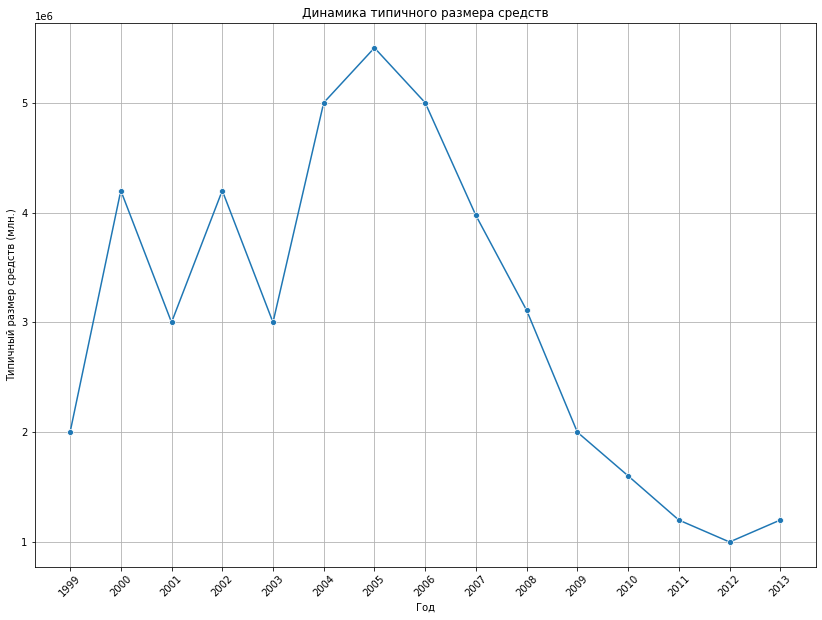

In [39]:
# Построим график
pivot_table_typical_filter = pivot_table_typical_filter.reset_index()

plt.figure(figsize=(14, 10))
sns.lineplot(x='year', y='typical_raised_amount', marker='o', data=pivot_table_typical_filter)

plt.xticks(pivot_table_typical_filter['year'], rotation=45)
plt.title('Динамика типичного размера средств')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (млн.)')
plt.grid()

plt.show()

Максимальный размер собранных средств был в 2005 году (5.5 млн. долларов). По количеству раундов 2013 год был самый объемный. Тенденция на увеличение количества раундов наблюдается с 2001 года по таблице. Вероятно, конкуренция среди стартапов и их инвесторов набирала обороты.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [40]:
# Объединяем таблицы из people и education
newdf = people_df.merge(education_df, on='id', how='left')
newdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 226708
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                226709 non-null  int64         
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   person_id         93525 non-null   float64       
 6   instituition      93474 non-null   object        
 7   graduated_at      51598 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.6+ MB


In [41]:
newdf.head()

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT


In [42]:
grouped = newdf.groupby('company_id').agg(
    total_employees=('id', 'nunique'),  # Подсчет общего количества сотрудников по 'id'
    employees_without_education=('graduated_at', lambda x: x.isnull().sum())
).reset_index()

# Добавляем столбец с долей сотрудников без информации об образовании
grouped['share_without_education'] = grouped['employees_without_education'] / grouped['total_employees']

# Создание категории в зависимости от количества сотрудников
grouped['category'] = pd.cut(
    grouped['total_employees'],
    bins=[0, 1, 2, 3, 5, 10, 20, 30, float('inf')],
    labels=['1', '2', '3', '4-5', '6-10', '11-20', '21-30', '31+']
)


# Рассчитываем среднюю долю сотрудников без информации об образовании для каждой категории
result_by_category = grouped.groupby('category').agg(
        total_companies=('company_id', 'nunique')
).reset_index()
# Выводим результирующую таблицу
display(result_by_category)

,category,total_companies
0,1,18117
1,2,2709
2,3,921
3,4-5,687
4,6-10,368
5,11-20,92
6,21-30,12
7,31+,16


In [43]:
# Подсчет общего количества компаний
sum_total_companies = result_by_category['total_companies'].sum()

# Рассчитываем долю компаний для каждой категории
result_by_category['share_of_companies'] = result_by_category['total_companies'] / sum_total_companies

# Выводим результирующую таблицу
display(result_by_category)

,category,total_companies,share_of_companies
0,1,18117,0.790376
1,2,2709,0.118183
2,3,921,0.040180
3,4-5,687,0.029971
4,6-10,368,0.016054
5,11-20,92,0.004014
6,21-30,12,0.000524
7,31+,16,0.000698


Самое большое количество компаний c 1-2-3 сотрудниками без информации об образовании. Градация была выбрана по нарастающей, так как подавляющее большинство маленьких компаний не содержит информацию про образование.

Присоединить таблицу с degree можно и, скорее всего, было бы полезно. Так как если в education есть факт образования, то в degree указана ученая степень и специальность. Это было бы полезно для инвесторов, так как уровень образования в том числе влияет на выделяемую помощь компании-стартапу.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [44]:
# Проверяем уникальные значения в столбце network_username для каждой таблицы
company_network_usernames = company_and_rounds_df['network_username'].value_counts()
people_network_usernames = people_df['network_username'].value_counts()
fund_network_usernames = fund_df['network_username'].value_counts()

display(company_network_usernames)
display(people_network_usernames)
display(fund_network_usernames)

Goodman_UK         20
IndiaMART          17
mobivery           15
tyropayments       15
AviirLabs          14
                   ..
IncaAccessorie      1
kreetitech          1
brooklynfoundry     1
SproutUps           1
smallcapvoice       1
Name: network_username, Length: 79571, dtype: int64

iWatchLife         6
chrislogan         5
firstscribe        4
ConnectAndSell     4
osiaffiliate       3
                  ..
bestacneproduc1    1
ClementCharles     1
Fxol               1
SorayaMuts         1
DenhaLance         1
Name: network_username, Length: 38421, dtype: int64

GrowthWorks      4
SVB_Financial    4
rwe_ag           3
KfW              3
OsageVC          3
                ..
midatel          1
stage1capital    1
NoaberImpact     1
stanchart        1
digitalsci       1
Name: network_username, Length: 2098, dtype: int64

In [45]:
# Уникальные значения в категориальных данных
unique_company_network_usernames = company_and_rounds_df['network_username'].unique()
unique_people_network_usernames = people_df['network_username'].unique()
unique_fund_network_usernames = fund_df['network_username'].unique()

display(unique_company_network_usernames)
display(unique_people_network_usernames)
display(unique_fund_network_usernames)

array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

array([nan, 'greylockvc', 'imi_vc', ..., 'CalSTRS', 'haystack_fund',
       'fbFund'], dtype=object)

In [46]:
# Меняем регистр 
company_and_rounds_df['network_username'] = company_and_rounds_df['network_username'].str.lower()
people_df['network_username'] = people_df['network_username'].str.lower()
fund_df['network_username'] = fund_df['network_username'].str.lower()
display(company_and_rounds_df['network_username'])
display(people_df['network_username'])
display(fund_df['network_username'])

0         bachelrwetpaint
1         bachelrwetpaint
2         bachelrwetpaint
3                     NaN
4                     NaN
               ...       
217769                NaN
217770                NaN
217771                NaN
217772                NaN
217773                NaN
Name: network_username, Length: 217774, dtype: object

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
226704               NaN
226705           network
226706    itechsocialnet
226707     socialnethubs
226708    esocialnetlike
Name: network_username, Length: 226709, dtype: object

0                  NaN
1           greylockvc
2                  NaN
3                  NaN
4                  NaN
             ...      
11647              NaN
11648       lcventures
11649          calstrs
11650    haystack_fund
11651           fbfund
Name: network_username, Length: 11652, dtype: object

In [47]:
# Поиск дубликатов в company_and_rounds_df
company_duplicates = company_and_rounds_df[company_and_rounds_df.duplicated(subset='network_username', keep=False)]
company_duplicate_count = company_duplicates['network_username'].value_counts()

# Поиск дубликатов в people_df
people_duplicates = people_df[people_df.duplicated(subset='network_username', keep=False)]
people_duplicate_count = people_duplicates['network_username'].value_counts()

# Поиск дубликатов в fund_df
fund_duplicates = fund_df[fund_df.duplicated(subset='network_username', keep=False)]
fund_duplicate_count = fund_duplicates['network_username'].value_counts()

# Отображаем результаты
display("Дубликаты в company_and_rounds_df:")
display(company_duplicate_count)

display("Дубликаты в people_df:")
display(people_duplicate_count)

display("Дубликаты в fund_df:")
display(fund_duplicate_count)


'Дубликаты в company_and_rounds_df:'

goodman_uk        20
indiamart         18
deemsmart         18
tyropayments      15
mobivery          15
                  ..
challengegames     2
ecovainc           2
alertmesays        2
wasabipro          2
kyield             2
Name: network_username, Length: 8525, dtype: int64

'Дубликаты в people_df:'

iwatchlife        6
chrislogan        5
firstscribe       4
connectandsell    4
gmrtranscripts    3
                 ..
lawrencejhall     2
eisenberg         2
kaldascenter      2
tony_aa           2
chijs             2
Name: network_username, Length: 460, dtype: int64

'Дубликаты в fund_df:'

growthworks        4
svb_financial      4
upfrontvc          3
annarborspark      3
osagevc            3
rwe_ag             3
kfw                3
enterpriselou      2
nwangelconf        2
dev                2
citgapfunds        2
gecapital          2
wedodeals          2
confrapar          2
innovasjonnorge    2
nationalbank       2
rhoventures        2
bdc_news           2
austinventures     2
blackstone         2
grayghostvt        2
omidyarnetwork     2
dfjvc              2
creditsuisse       2
goldmansachs       2
arcangelfund       2
coreemc            2
sequoia_capital    2
newfund            2
bpifrance          2
innovacomvc        2
ignia_fund         2
signal_peak        2
pmvnv              2
blackbirdvc        2
iaventures         2
htgf_              2
clubitalia2        2
guggenheimptnrs    2
birchmerevc        2
rwbaird            2
kpcb               2
startupminds       2
nsvf               2
nab                2
shinhanbankeng     2
thomvest           2
palcapital   

In [48]:
# Проверяем уникальные значения и дубликаты
for df_name, df in zip(['company_and_rounds', 'people', 'fund'], [company_and_rounds_df, people_df, fund_df]):
    unique_count = df['network_username'].nunique()
    total_count = df['network_username'].count()
    display(f'{df_name}: уникальные значения = {unique_count}, всего значений = {total_count}')

# Сравниваем дубликаты между датасетами
common_people_fund = set(people_df['network_username']).intersection(set(fund_df['network_username']))
common_people_company = set(people_df['network_username']).intersection(set(company_and_rounds_df['network_username']))
common_fund_company = set(fund_df['network_username']).intersection(set(company_and_rounds_df['network_username']))

display(f'Общие значения между people и fund: {len(common_people_fund)}')
display(f'Общие значения между people и company: {len(common_people_company)}')
display(f'Общие значения между fund и company: {len(common_fund_company)}')

'company_and_rounds: уникальные значения = 79374, всего значений = 95534'

'people: уникальные значения = 38384, всего значений = 38867'

'fund: уникальные значения = 2091, всего значений = 2149'

'Общие значения между people и fund: 97'

'Общие значения между people и company: 2504'

'Общие значения между fund и company: 88'

Судя по выводу уникальных данных, значения в датасетах существенно отличаются, поэтому для объединения столбец network_usename не будем. Самое большое количество пересечений между people и company (2504), однако это составляет порядка 2.5% от общего количества значений (95534), пересечений достаточно мало. Пересечний у fund с people и company менее 100, из-за этого не стал бы использовать объединение данных по данному столбцу, также имеем в датасетах большое количество пропусков (в некоторых столбцах 75-80%).


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [49]:
company_and_rounds_df.head(-5)


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217764,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,55358.0,269728.0,2013-08-14,series-a,5600000.0,0.0,7.0,1.0,1.0,2013.0
217765,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,55492.0,78698.0,2013-11-20,series-a,15000000.0,0.0,1.0,1.0,1.0,2013.0
217766,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,56054.0,196289.0,2011-03-01,other,925000.0,0.0,0.0,1.0,1.0,2011.0
217767,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,56158.0,282450.0,2013-11-26,series-a,2600000.0,0.0,0.0,1.0,1.0,2013.0


In [50]:
company_and_rounds_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    object        
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [51]:
# Считаем долю пропусков
company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
new_company_id         0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
year                   0.758098
dtype: float64

В упражнении выше названия столбцов были приведены к единому стилю (убраны два пробела), также столбцы с датами приведены к типу datetime. Складывается ощущение по названию датасета и количеству пропусков, что данные собраны из двух датасетов, причем "правая" часть начинается либо с investment_rounds (что вероятнее), либо с funding_round_id. "Левая" часть датасета - данные о компании, правая - данные о раундах инвестирования. Доля пропусков в правой части составляет почти 0.76. Столбец year в конце повторяет данные столбца funded_at. Показан год из полной даты финансирования. Есть похожие поля company_ID и company_id. Во втором значении из правой части доля пропусков 0.76, в левой части их практически нет.

In [52]:
# Определение столбцов для преобразования
columns_to_convert = [
    'company_id', 
    'investment_rounds', 
    'milestones', 
    'funding_round_id', 
    'year'
]

# Приведение к типу int64 с обработкой NaN значений
for column in columns_to_convert:
    # Прежде чем преобразовать в int, заменяем NaN значения
    company_and_rounds_df[column] = pd.to_numeric(company_and_rounds_df[column], errors='coerce').fillna(-1).astype('int64')

# Проверка типов столбцов после преобразования
print(company_and_rounds_df.dtypes)

company_id                      int64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at                      object
domain                         object
network_username               object
country_code                   object
investment_rounds               int64
funding_rounds                float64
funding_total                 float64
milestones                      int64
funding_round_id                int64
new_company_id                float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
year                            int64
dtype: object


Столбцы 'company_ID', 'investment_rounds', 'milestones', 'funding_round_id', 'year' преобразовал из float64 в int64, поставив заглушку (-1) через (errors='coerce').fillna(-1). В предыдущем спринте была рекомендация менять тип, это снижает объем и нагрузку на ядро. Возможно, также следует поменять данные в части других столбцов, которые имеют целочисленные значения. Большое количество пропусков (75%) удалять не можем, так как это повлияет на результаты дальнейших расчетов. Замена средним или медианой также сильно исказит значения.

In [53]:
company_and_rounds_df.head(-5)


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,888,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,889,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,2312,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,100,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217764,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,55358,269728.0,2013-08-14,series-a,5600000.0,0.0,7.0,1.0,1.0,2013
217765,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,55492,78698.0,2013-11-20,series-a,15000000.0,0.0,1.0,1.0,1.0,2013
217766,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,56054,196289.0,2011-03-01,other,925000.0,0.0,0.0,1.0,1.0,2011
217767,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,56158,282450.0,2013-11-26,series-a,2600000.0,0.0,0.0,1.0,1.0,2013


In [54]:
# Меняем регистр 
company_and_rounds_df['name'] = company_and_rounds_df['name'].str.lower()
company_and_rounds_df['domain'] = company_and_rounds_df['domain'].str.lower()
company_and_rounds_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,888,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,889,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,2312,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,100,there,games_video,acquired,NaT,NaN,there.com,NaN,USA,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,56454,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011
217770,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,56542,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011
217771,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,56543,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012
217772,-1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,...,56928,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013


In [55]:
# Подсчитываем количество пропусков в каждом столбце
missing_counts = company_and_rounds_df.isna().sum()

# Рассчитываем долю пропусков
missing_part = missing_counts / len(company_and_rounds_df)

# Создаем датафрейм с результатами
missing_data = pd.DataFrame({'Количество пропусков': missing_counts, 'Доля пропусков': missing_part})

# Выводим результаты
print(missing_data)

                     Количество пропусков  Доля пропусков
company_id                              0        0.000000
name                                  302        0.001387
category_code                       73888        0.339288
status                                302        0.001387
founded_at                         107818        0.495091
closed_at                          214325        0.984162
domain                              70615        0.324258
network_username                   122240        0.561316
country_code                       109167        0.501286
investment_rounds                       0        0.000000
funding_rounds                        302        0.001387
funding_total                         302        0.001387
milestones                              0        0.000000
funding_round_id                        0        0.000000
new_company_id                     164846        0.756959
funded_at                          165094        0.758098
funding_round_

In [56]:
# Удаляем строки с пропусками в name. Ихвсего 302 штук
company_and_rounds_df = company_and_rounds_df[~company_and_rounds_df['name'].isna()]

# Выводим обновленный датафрейм
company_and_rounds_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,888,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,889,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,...,2312,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,100,there,games_video,acquired,NaT,NaN,there.com,NaN,USA,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217467,7748,flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,...,2836,7748.0,2008-01-31,angel,1300000.0,0.0,8.0,1.0,1.0,2008
217468,174536,pphotonet,games_video,operating,2012-05-01,NaN,pphotonet.co,pphotonet,NaN,0,...,-1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
217469,43233,photonet,photo_video,acquired,2010-03-01,NaN,photonet.com,photonet,USA,0,...,12687,43233.0,2010-03-05,angel,500000.0,0.0,2.0,0.0,1.0,2010
217470,43233,photonet,photo_video,acquired,2010-03-01,NaN,photonet.com,photonet,USA,0,...,21259,43233.0,2011-02-02,series-a,7000000.0,0.0,5.0,0.0,0.0,2011


Удалил 302 пропуска, это порядка 0.14% от всех значений, этим можно пренебречь.

In [57]:
# Проверяем полные дубликаты в датафрейме
company_and_rounds_df.duplicated().sum()

0

In [58]:
# Выводим названия столбцов
display(company_and_rounds_df.columns.tolist())


['company_id',
 'name',
 'category_code',
 'status',
 'founded_at',
 'closed_at',
 'domain',
 'network_username',
 'country_code',
 'investment_rounds',
 'funding_rounds',
 'funding_total',
 'milestones',
 'funding_round_id',
 'new_company_id',
 'funded_at',
 'funding_round_type',
 'raised_amount',
 'pre_money_valuation',
 'participants',
 'is_first_round',
 'is_last_round',
 'year']

In [59]:
# Разделяем на 2 датасета. Определяем индекс столбца new_company_id
split_index = company_and_rounds_df.columns.get_loc('new_company_id')

# Разделяем на две части
part1_df = company_and_rounds_df.iloc[:, :split_index]  # Все столбцы до new_company_id
part2_df = company_and_rounds_df.iloc[:, split_index:]  # Все столбцы начиная с new_company_id


In [60]:
part1_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id
0,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3.0,39750000.0,5,888
1,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3.0,39750000.0,5,889
2,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3.0,39750000.0,5,2312
3,10,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0,0.0,0.0,0,-1
4,100,there,games_video,acquired,NaT,NaN,there.com,NaN,USA,0,0.0,0.0,4,-1


In [61]:
part1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  int64         
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    object        
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  int64         
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  int64         
 13  funding_round_id   217472 non-null  int64   

In [62]:
# Сортируем part1_df по возрастанию company_id и сбрасываем индекс
part1_df_sorted = part1_df.sort_values(by='company_id').reset_index(drop=True)

# Выводим отсортированную первую часть данных
display(part1_df_sorted.head()) 

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id
0,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3.0,39750000.0,5,888
1,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3.0,39750000.0,5,889
2,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3.0,39750000.0,5,2312
3,2,adventnet,enterprise,operating,1996-01-01,NaN,adventnet.com,manageengine,USA,0,0.0,0.0,0,-1
4,3,zoho,software,operating,2005-09-15,NaN,zoho.com,zoho,USA,0,0.0,0.0,5,-1


In [63]:
# Определяем неявные дубликаты в DataFrame
duplicates1 = part1_df_sorted.duplicated(subset=['company_id'])

# Считаем количество дубликатов
num_duplicates1 = duplicates1.sum()

# Выводим количество дубликатов
display(num_duplicates1)

20919

In [64]:
# Удаляем дубликаты
part1_df_sorted = part1_df_sorted.drop_duplicates(subset=['company_id'])
# Установим формат отображения чисел
pd.options.display.float_format = '{:,.0f}'.format

part1_df_sorted

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id
0,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3,"39,750,000",5,888
3,2,adventnet,enterprise,operating,1996-01-01,NaN,adventnet.com,manageengine,USA,0,0,0,0,-1
4,3,zoho,software,operating,2005-09-15,NaN,zoho.com,zoho,USA,0,0,0,5,-1
5,4,digg,news,acquired,2004-10-11,NaN,digg.com,digg,USA,0,4,"45,000,000",8,85
9,5,socialnet,social,ipo,2004-02-01,NaN,socialnet.com,socialnet,USA,3,11,"2,425,700,000",5,4587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217467,286210,lg electronics north america,NaN,operating,NaT,NaN,NaN,NaN,NaN,0,0,0,1,-1
217468,286211,m1 capital advisors llc,NaN,operating,NaT,NaN,NaN,NaN,NaN,0,0,0,0,-1
217469,286212,m1 partners,NaN,operating,NaT,NaN,NaN,NaN,NaN,0,0,0,0,-1
217470,286213,computer solutions,NaN,operating,NaT,NaN,NaN,NaN,NaN,0,0,0,0,-1


In [65]:
part2_df.head()

,new_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,2005-10-01,series-a,"5,250,000",0,2,0,1,2005
1,1,2007-01-01,series-b,"9,500,000",0,3,0,0,2007
2,1,2008-05-19,series-c+,"25,000,000",0,4,1,0,2008
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [66]:
part2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   new_company_id       52626 non-null   float64       
 1   funded_at            52382 non-null   datetime64[ns]
 2   funding_round_type   52626 non-null   object        
 3   raised_amount        52626 non-null   float64       
 4   pre_money_valuation  52626 non-null   float64       
 5   participants         52626 non-null   float64       
 6   is_first_round       52626 non-null   float64       
 7   is_last_round        52626 non-null   float64       
 8   year                 217472 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 16.6+ MB


In [67]:
# Переименование назад столбца new_company_id в company_id в part2
part2_df.rename(columns={'new_company_id': 'company_id'}, inplace=True)

display(part2_df)

,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,2005-10-01,series-a,"5,250,000",0,2,0,1,2005
1,1,2007-01-01,series-b,"9,500,000",0,3,0,0,2007
2,1,2008-05-19,series-c+,"25,000,000",0,4,1,0,2008
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
217467,"7,748",2008-01-31,angel,"1,300,000",0,8,1,1,2008
217468,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-1
217469,"43,233",2010-03-05,angel,"500,000",0,2,0,1,2010
217470,"43,233",2011-02-02,series-a,"7,000,000",0,5,0,0,2011


In [68]:
# Сортируем part2_df по возрастанию company_id и сбрасываем индекс
part2_df_sorted = part2_df.sort_values(by='company_id').reset_index(drop=True)

# Выводим отсортированную первую часть данных
display(part2_df_sorted.head()) 

,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,2005-10-01,series-a,"5,250,000",0,2,0,1,2005
1,1,2007-01-01,series-b,"9,500,000",0,3,0,0,2007
2,1,2008-05-19,series-c+,"25,000,000",0,4,1,0,2008
3,4,2011-07-12,series-c+,"5,000,000",0,0,1,0,2011
4,4,2008-09-24,series-c+,"28,700,000",0,4,0,0,2008


Удалено 302 пропуска и 20919 дубликатов. Если ошибок нет, то можно приступать к исследовательскому анализу.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке status указано acquired.

Далее работайте только с этими данными.



In [69]:
# Проверяем полные дубликаты в acquisition
acquisition_df.duplicated().sum()

0

In [70]:
# Подсчитываем количество пропусков в каждом столбце
missing_counts = acquisition_df.isna().sum()

# Рассчитываем долю пропусков
missing_part = missing_counts / len(acquisition_df)

# Создаем датафрейм с результатами
missing_data = pd.DataFrame({'Количество пропусков': missing_counts, 'Доля пропусков': missing_part})

# Выводим результаты
print(missing_data)

                      Количество пропусков  Доля пропусков
id                                       0               0
acquiring_company_id                     0               0
acquired_company_id                      0               0
term_code                             7576               1
price_amount                             0               0
acquired_at                             29               0


In [71]:
# Определяем неявные дубликаты в DataFrame
duplicates2 = acquisition_df.duplicated(subset=['acquired_company_id'])

# Считаем количество дубликатов
num_duplicates2 = duplicates2.sum()

# Выводим количество дубликатов
display(num_duplicates2)

143

In [72]:
# Удаляем дубликаты
acquisition_df = acquisition_df.drop_duplicates(subset=['acquired_company_id'])

acquisition_df

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


In [73]:
# Объединяем датасеты и фильтруем по условию
filtered_companies_df = part1_df_sorted[(part1_df_sorted['funding_rounds']>0) | (part1_df_sorted['investment_rounds']>0) | (part1_df_sorted['status']=='acquired')]
union_df = filtered_companies_df.merge(acquisition_df, left_on='company_id', right_on='acquired_company_id', how='left')
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 40746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40747 non-null  int64         
 1   name                  40747 non-null  object        
 2   category_code         35315 non-null  object        
 3   status                40747 non-null  object        
 4   founded_at            27807 non-null  datetime64[ns]
 5   closed_at             2128 non-null   object        
 6   domain                35754 non-null  object        
 7   network_username      20850 non-null  object        
 8   country_code          34742 non-null  object        
 9   investment_rounds     40747 non-null  int64         
 10  funding_rounds        40747 non-null  float64       
 11  funding_total         40747 non-null  float64       
 12  milestones            40747 non-null  int64         
 13  funding_round_id

In [74]:
union_df.head (20)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,bachelrwetpaint,USA,0,3,"39,750,000",5,888,NaN,NaN,NaN,NaN,NaN,NaT
1,4,digg,news,acquired,2004-10-11,NaN,digg.com,digg,USA,0,4,"45,000,000",8,85,"7,386","20,953",4,NaN,"500,000",2012-07-12
2,5,socialnet,social,ipo,2004-02-01,NaN,socialnet.com,socialnet,USA,3,11,"2,425,700,000",5,4587,NaN,NaN,NaN,NaN,NaN,NaT
3,7,omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,nomadesk,ISR,0,1,"800,000",4,225,NaN,NaN,NaN,NaN,NaN,NaT
4,8,postini,web,acquired,1999-06-02,NaN,postini.com,NaN,USA,0,0,0,0,-1,419,59,8,cash,"625,000,000",2007-07-09
5,9,geni,web,acquired,2006-06-01,NaN,geni.com,geni,USA,0,3,"16,500,000",4,7,"7,954",687,9,NaN,0,2012-11-28
6,10,flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0,0,0,0,-1,1,11,10,NaN,"20,000,000",2007-05-30
7,11,fox interactive media,web,operating,1979-06-01,NaN,newscorp.com,networkapi,USA,2,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaT
8,12,network,social,ipo,2006-03-21,NaN,network.com,network,USA,0,8,"1,160,170,000",6,2106,NaN,NaN,NaN,NaN,NaN,NaT
9,13,stumbleupon,web,acquired,2002-02-01,NaN,stumbleupon.com,stumbleupon,USA,0,4,"18,500,000",5,8,"4,283",20,13,NaN,0,2007-05-30



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [75]:
# Изучаем статистические показатели столбца funding_total
display(union_df['funding_total'].describe())

count          40,747
mean       10,135,610
std        56,464,360
min                 0
25%                 0
50%           600,000
75%         5,650,650
max     5,700,000,000
Name: funding_total, dtype: float64

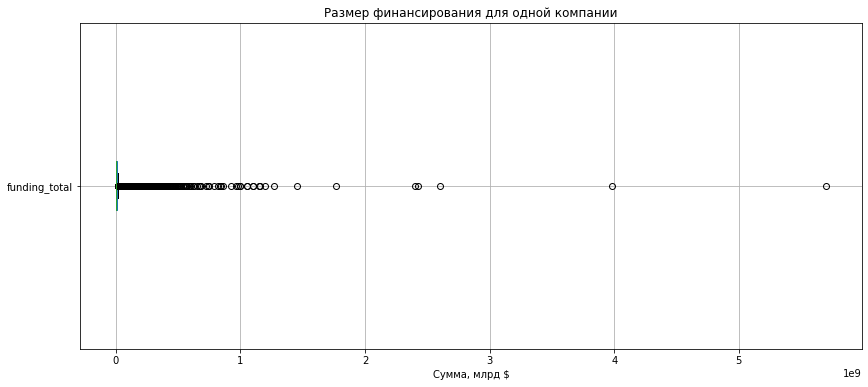

In [76]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим диаграмму размаха значений в столбце seats
union_df.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Размер финансирования для одной компании')
plt.xlabel('Сумма, млрд $')

# Выводим график
plt.show()

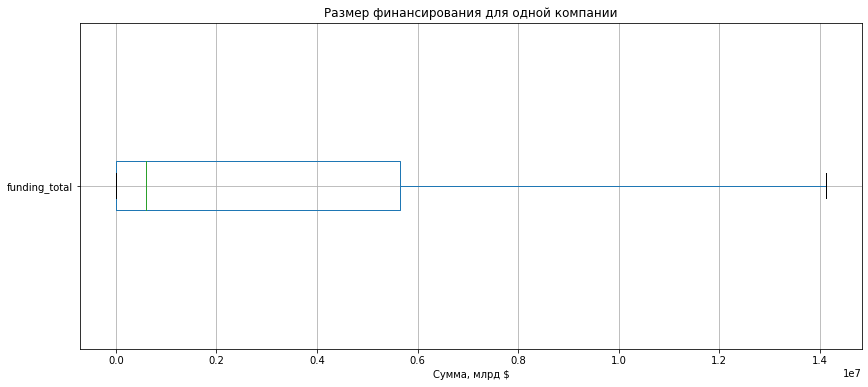

In [77]:
# Создаём контейнер графика matplotlib и задаём его размер (без выбросов)
plt.figure(figsize=(14, 6))

# Строим диаграмму размаха значений в столбце seats
union_df.boxplot(column='funding_total', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Размер финансирования для одной компании')
plt.xlabel('Сумма, млрд $')

# Выводим график
plt.show()

Если смотреть общую динамику по объему финансирования, то данные имеют широкий разброс. Медиана - 600 000 долларов, среднее значение - 10 135 610 долларов, при этом стандартное отклонение - 56 464 360 долларов Также достаточно много нулевых значений. Q1 (25% значений) = 0, Q3 (75% значений) = 5 650 000, данные за пределами правой границы составляют 5 650 000 + ((5 650 000 - 0) * 1,5) = 14 125 000 долларов. Данные правее этого значения являются выбросами. Есть и значение 5 700 000 000 долларов.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [78]:
# Фильтруем компании
filtered_0_1_companies = union_df[((union_df['price_amount'] == 0) | (union_df['price_amount'] == 1)) & (union_df['funding_total'] > 0)]

# Выводим отфильтрованные данные
print(filtered_0_1_companies[['name', 'price_amount', 'funding_total']])

                            name  price_amount  funding_total
5                           geni             0     16,500,000
9                    stumbleupon             0     18,500,000
10                        gizmoz             0     18,100,000
18                         joost             0     45,000,000
31                          kyte             0     23,350,000
...                          ...           ...            ...
37089                   pluromed             0      2,437,900
37106       rhetorical group plc             0      6,303,110
37272  endurance lending network             0      1,500,000
37967                   wiiiwaaa             0         50,000
38360               plink search             0        100,000

[1584 rows x 3 columns]


In [79]:
display(filtered_0_1_companies['funding_total'].describe())

count           1,584
mean       17,859,643
std       145,666,042
min             3,750
25%         2,000,000
50%         6,000,000
75%        15,400,000
max     5,700,000,000
Name: funding_total, dtype: float64

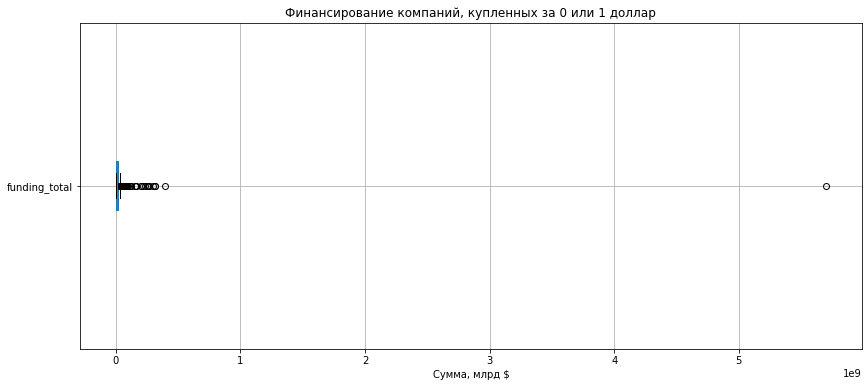

In [80]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим диаграмму размаха значений в столбце seats
filtered_0_1_companies.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Финансирование компаний, купленных за 0 или 1 доллар')
plt.xlabel('Сумма, млрд $')

# Выводим график
plt.show()

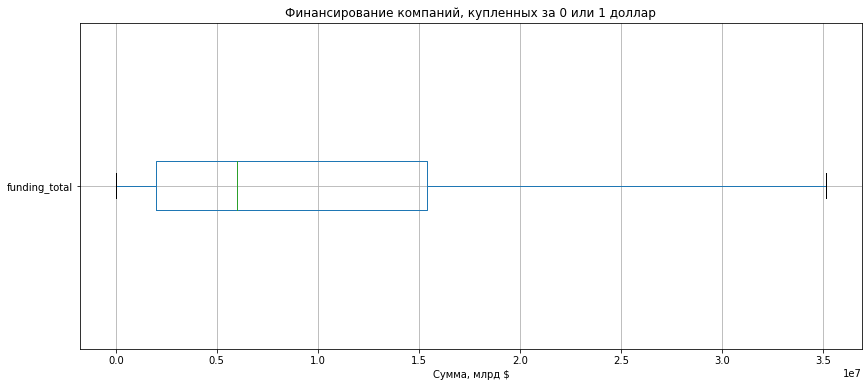

In [81]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим диаграмму размаха значений в столбце seats
filtered_0_1_companies.boxplot(column='funding_total', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Финансирование компаний, купленных за 0 или 1 доллар')
plt.xlabel('Сумма, млрд $')

# Выводим график
plt.show()

Если смотреть общую динамику по объему финансирования компаний, купленных за 0 или 1 доллар, то данные также имеют широкий разброс. Медиана - 6 000 000 долларов, среднее значение - 17 859 643 долларов, при этом стандартное отклонение - 145 666 042 долларов. Q1 (25% значений) = 2 000 000, Q3 (75% значений) = 15 400 000.


In [82]:
# Вычисляем Q1, Q3 и IQR
Q1 = filtered_0_1_companies['funding_total'].quantile(0.25)
Q3 = filtered_0_1_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Вычисляем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ограничиваем нижнюю и верхнюю границы на уровне минимального и максимального значения
lower_bound = max(lower_bound, filtered_0_1_companies['funding_total'].min())
upper_bound = min(upper_bound, filtered_0_1_companies['funding_total'].max())

# Определяем процентильные значения, соответствующие границам
# Корректно определяем процентильные позиции
# Используем clip для приведения к диапазону [0, 1]
lower_percentile = filtered_0_1_companies['funding_total'].quantile(0.25) if lower_bound <= Q1 else \
    (filtered_0_1_companies['funding_total'] <= lower_bound).mean()  # Пропорция элементов <= lower_bound

upper_percentile = filtered_0_1_companies['funding_total'].quantile(0.75) if upper_bound >= Q3 else \
    (filtered_0_1_companies['funding_total'] >= upper_bound).mean()  # Пропорция элементов >= upper_bound

# Результаты
print(f'Нижняя граница выбросов: {lower_bound}')
print(f'Верхняя граница выбросов: {upper_bound}')


Нижняя граница выбросов: 3750.0
Верхняя граница выбросов: 35500000.0


Кажется, что разброс значений слишком большой (практически от 0 до 35.5 млн долларов), разброс 25 и 75 процентиля от 2 млн до 15.4 млн, разница проактически в 8 раз, поэтому заполнять бы выбросы значениями процентиле не стал, это может сильно искажать анализ.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [83]:
# Смотрим уникальные значения по категориям кода
unique_category_codes = union_df['category_code'].unique()


display(unique_category_codes)


array(['web', 'news', 'social', 'network_hosting', 'games_video', 'music',
       'mobile', 'search', 'advertising', 'messaging', 'software',
       'enterprise', 'security', 'finance', 'hardware',
       'public_relations', 'ecommerce', 'travel', 'medical',
       'real_estate', 'other', 'photo_video', 'semiconductor',
       'consulting', 'analytics', 'health', 'legal', 'sports', 'biotech',
       'cleantech', 'education', 'transportation', 'manufacturing',
       'hospitality', 'fashion', 'nanotech', 'nonprofit', 'automotive',
       nan, 'design', 'local', 'pets', 'government'], dtype=object)

In [84]:
# Поставим значения с ценой больше 0
filtered_union_df = union_df[union_df['price_amount'] > 0]
category_codes_median = filtered_union_df.groupby('category_code')['price_amount'].describe()

# Преобразуем результат в DataFrame
category_codes_median_df = category_codes_median.reset_index()

# Переименуем колонки, чтобы упростить доступ к ним
category_codes_median_df.columns = ['category', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Сортируем по медиане
sorted_category_codes_median = category_codes_median_df.sort_values(by='50%', ascending=False)

# Отображаем результаты
display(sorted_category_codes_median.head(25))

,category,count,mean,std,min,25%,50%,75%,max
2,automotive,3,"2,547,666,667","2,581,669,292","43,000,000","1,221,500,000","2,400,000,000","3,800,000,000","5,200,000,000"
33,sports,2,"622,500,000","512,652,416","260,000,000","441,250,000","622,500,000","803,750,000","985,000,000"
21,nanotech,1,"584,000,000",NaN,"584,000,000","584,000,000","584,000,000","584,000,000","584,000,000"
27,real_estate,6,"1,465,500,000","2,676,302,206","3,000,000","42,500,000","400,000,000","1,012,500,000","6,850,000,000"
16,manufacturing,21,"813,757,161","1,060,434,506",373,"40,000,000","351,000,000","1,280,000,000","4,050,000,000"
34,transportation,3,"450,000,000","572,625,532","20,000,000","125,000,000","230,000,000","665,000,000","1,100,000,000"
3,biotech,262,"736,243,176","1,971,954,950","109,000","33,250,000","200,000,000","500,000,000","20,000,000,000"
1,analytics,3,"181,000,000","92,967,736","80,000,000","140,000,000","200,000,000","231,500,000","263,000,000"
9,fashion,3,"187,500,000","86,494,219","97,500,000","146,250,000","195,000,000","232,500,000","270,000,000"
6,ecommerce,49,"246,241,021","282,331,182",11,"13,950,000","180,000,000","350,000,000","1,250,000,000"


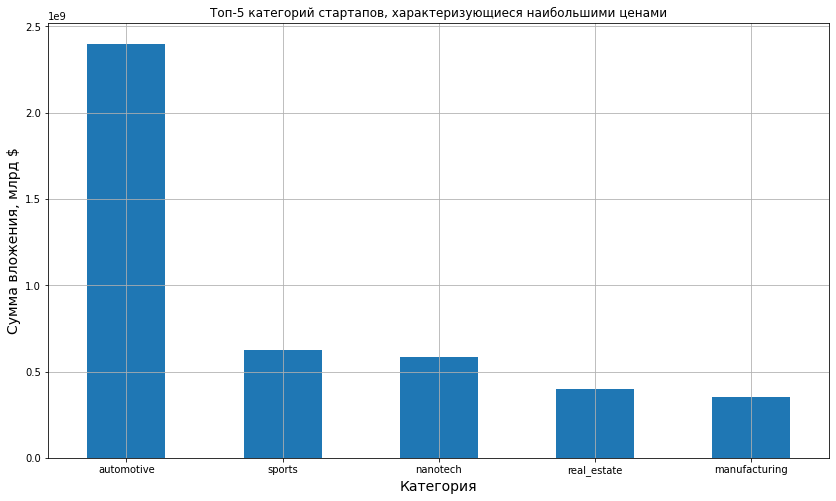

In [85]:
# Группируем по категориям и считаем по медиане для price_amount
grouped = filtered_union_df.groupby('category_code')['price_amount'].median()

# Сортируем значения
grouped_sorted = grouped.sort_values(ascending=False)

# Выбираем топ-5 категорий с наибольшими значениями
top_5_categories = grouped_sorted.head(5)

# Настройка графика
plt.figure(figsize=(14, 8))  # Увеличение размера графика

# Построение графика
top_5_categories.plot(kind='bar',
                      title='Топ-5 категорий стартапов, характеризующиеся наибольшими ценами',
                      legend=False,
                      rot=0)

# Установка меток осей
plt.ylabel('Сумма вложения, млрд $', fontsize=14)
plt.xlabel('Категория', fontsize=14)

plt.grid()

# Выводим график
plt.show()

Была выбрана медиана (50%) значений, чтобы увидеть наибольшие цены. Всего есть порядка 40 категорий, из них выбрал топ-5 для показа привлекательности инвесторам. Это самые популярные категории. Сильно лидируют автомобильные стартапы (2.4 млрд), далее спорт (0.62 млрд), нанотехнологии (0.58 млрд), недвижимость (0.4 млрд) и производство (0.35 млрд). У 6 места показатель 0.23 млрд, далее цифры еще ниже.

In [86]:
# Поставим значения с ценой больше 0
filtered_union_df = union_df[union_df['price_amount'] > 0]
category_codes_std = filtered_union_df.groupby('category_code')['price_amount'].describe()

# Преобразуем результат в DataFrame
category_codes_std_df = category_codes_std.reset_index()

# Переименуем колонки, чтобы упростить доступ к ним
category_codes_std_df.columns = ['category', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Сортируем по стандартному отклонению
sorted_category_codes_std = category_codes_std_df.sort_values(by='std', ascending=False)

# Отображаем результаты
display(sorted_category_codes_std.head(20))

,category,count,mean,std,min,25%,50%,75%,max
26,public_relations,72,"1,868,321,875","6,944,050,971","25,000","16,557,500","110,000,000","409,500,000","39,000,000,000"
27,real_estate,6,"1,465,500,000","2,676,302,206","3,000,000","42,500,000","400,000,000","1,012,500,000","6,850,000,000"
2,automotive,3,"2,547,666,667","2,581,669,292","43,000,000","1,221,500,000","2,400,000,000","3,800,000,000","5,200,000,000"
24,other,81,"543,479,698","2,097,598,454",1,"15,000,000","70,000,000","365,000,000","18,400,000,000"
3,biotech,262,"736,243,176","1,971,954,950","109,000","33,250,000","200,000,000","500,000,000","20,000,000,000"
13,health,10,"1,065,050,000","1,927,099,525","2,500,000","96,250,000","140,000,000","409,750,000","5,400,000,000"
8,enterprise,113,"559,404,460","1,614,921,635","20,000","12,900,000","56,500,000","327,000,000","13,900,000,000"
11,games_video,85,"459,847,424","1,487,437,889",60,"20,000,000","51,500,000","210,000,000","10,000,000,000"
29,security,35,"617,778,571","1,395,628,675","1,850,000","57,500,000","169,000,000","525,000,000","7,680,000,000"
19,mobile,117,"352,918,735","1,319,471,637","5,000","17,800,000","56,000,000","165,000,000","12,500,000,000"


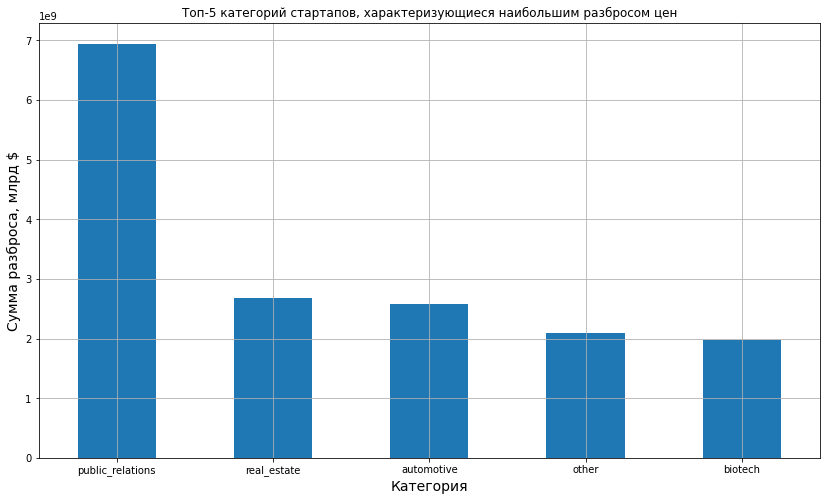

In [87]:
# Группируем по категориям и считаем по стандартному отклонению для price_amount
grouped = filtered_union_df.groupby('category_code')['price_amount'].std()

# Сортируем значения
grouped_sorted = grouped.sort_values(ascending=False)

# Выбираем топ-5 категорий с наибольшими значениями
top_5_categories = grouped_sorted.head(5)

# Настройка графика
plt.figure(figsize=(14, 8))  # Увеличение размера графика

# Построение графика
top_5_categories.plot(kind='bar',
                      title='Топ-5 категорий стартапов, характеризующиеся наибольшим разбросом цен',
                      legend=False,
                      rot=0)

# Установка меток осей
plt.ylabel('Сумма разброса, млрд $', fontsize=14)
plt.xlabel('Категория', fontsize=14)

plt.grid()

# Выводим график
plt.show()

Аналогично выбрано топ-5 по разбросу цен. Здесь считали разброс цен по стандартному отклонению. Наибольший разброс цен у связей с общественностью (6.9 млрд), потом недвижимость (2.7 млрд), автомобили (2.6 млрд). Другие (2.1 млрд) и биотехнологии (2 млрд).


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [88]:
# Изучаем статистические показатели столбца rating
display(union_df['funding_rounds'].describe())

count   40,747
mean         1
std          1
min          0
25%          1
50%          1
75%          2
max         15
Name: funding_rounds, dtype: float64

In [89]:
# Фильтруем данные, оставляем только записи с funding_rounds > 0
filtered_union_df = union_df[union_df['funding_rounds'] > 0]

# Изучаем статистические показатели столбца funding_rounds по статусам
status_rounds_stats = filtered_union_df.groupby('status')['funding_rounds'].describe()

# Преобразуем результат в DataFrame
status_rounds_stats_df = status_rounds_stats.reset_index()

# Сортируем по средней величине funding_rounds
sorted_status_rounds_stats = status_rounds_stats_df.sort_values(by='mean', ascending=False)

# Отображаем результаты
display(sorted_status_rounds_stats)

,status,count,mean,std,min,25%,50%,75%,max
2,ipo,490,3,2,1,1,2,3,13
0,acquired,"2,593",2,1,1,1,1,2,12
3,operating,"26,535",2,1,1,1,1,2,15
1,closed,"2,089",1,1,1,1,1,2,8


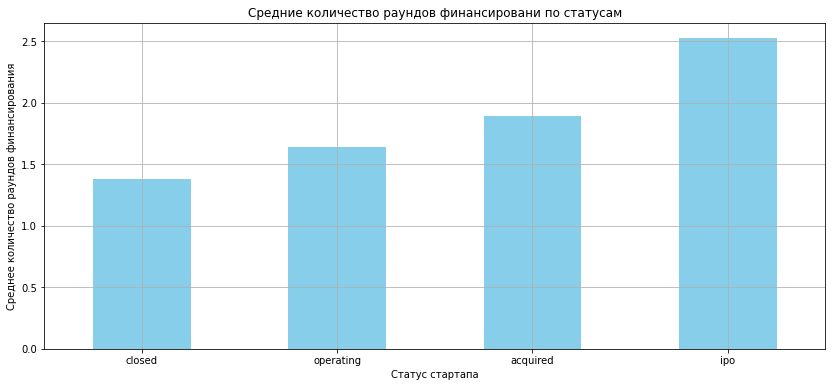

In [90]:
# Подсчитываем среднее количество раундов
mean_status = filtered_union_df.groupby('status')['funding_rounds'].mean().sort_values()

# Визуализируем среднее количество раундов по статусам с помощью столбчатой диаграммы
plt.figure(figsize=(14, 6))
mean_status.plot(kind='bar', color='skyblue')

# Добавляем заголовок и метки осей
plt.title('Средние количество раундов финансировани по статусам')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.xticks(rotation=0)

plt.grid()

# Выводим график
plt.show()

Количество раундов в таблице округлено до целого. По графику видно, что для ipo требуется примерно 2.5 раунда в среднем, для acquired - 1.9, для operating - 1.6, для closed - 1.4


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных. 
 
 Изначально были просмотрены 5 основных и 2 дополнительных датасета. Проанализированы строки и столбцы, тип значений, название столбцов приведено к единому виду. Далее были обработаны пропуски и дубликаты.

Изучены раунды финансирования по годам. Максимальный объем собранных средств был зафиксирован в 2005 году (5.5 млн долларов). 2013 год стал рекордным по количеству инвестиционных раундов, демонстрируя рост конкуренции среди стартапов и инвесторов с 2001 года.


Изучена информация об образовании сотрудников. Основная масса стартапов состоит из небольших команд (1-3 сотрудника), что создает трудности с доступностью информации об образовании основателей. Чтобы изучить более детально образование, требуется проработать тип образования и специальность.

Выяснили, что самый большой датасет company_and_rounds состоял из двух датасетов. Общий датасет разделили, к полученному датасету Union_df присоединили acquisition_df и с ним проводили работу.

Данные о финансировании компаний на уровне 0 или 1 доллар показывают высокий разброс с медианой 6 миллионов долларов и средним значением 17.86 миллионов долларов. Стандартное отклонение (145.67 миллионов долларов) указывает на значительное искажение данных из-за выбросов.

спользование медианы для анализа цен позволяет избежать искажений, вызванных выбросами. В топ-5 по наибольшему объему финансирования выделяются автомобильные стартапы, спортивные, нанотехнологические, недвижимость и производство. Наибольший разброс цен наблюдается в сфере связей с общественностью, дальше идут недвижимость и автомобили.

Среднее количество раундов, необходимых для успешного выхода на IPO, составляет примерно 2.5, в то время как для компаний, которые были приобретены, это 1.9, а для действующих стартапов — 1.6. Компании, которые закрылись, в среднем собирали 1.4 раунда.

В будущем следует уделять внимание качественному сбору данных о стартапах, чтобы улучшить понимание их успеха и факторов, влияющих на конкуренцию.
Рекомендуется проанализировать изменения в структуре финансирования стартапов в последние годы для более точного прогнозирования будущих тенденций.